In [6]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.1.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backp

In [ ]:
pip install tensorflow-rocm

In [4]:
pip install tensorflow

     |████████████████████████████████| 589.8 MB 27 kB/s  eta 0:00:01
     |████████████████████████████████| 4.8 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 311 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 945 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.6 MB/s eta 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation

In [5]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input # This will convert images from RGB to BGR, also note that this is a preprocessing so we need to use this before pass to the model.
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# Input: This is a Keras function that creates a placeholder for input data. It's typically used at the beginning of a Keras model to define the shape of the input data.
# Lambda: allows you to create custom layers or apply custom functions to the data flowing through your model. 
# Dense:  This is a standard fully connected layer in a neural network. Each neuron in a dense layer is connected to every neuron in the previous layer, and it applies a linear transformation followed by an activation function to the input data.
# Flatten:  This is another type of layer in Keras that's often used in convolutional neural networks (CNNs). It's used to convert multi-dimensional data (e.g., images represented as 2D arrays) into a one-dimensional array. 

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32

In [8]:
# train_path = 'Datasets/Train'
# valid_path = 'Datasets/Test'

In [26]:
data_set = tf.keras.preprocessing.image_dataset_from_directory(
    "Skin Oiliness Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE),
    #images will be resized to 256x256 pixels.
    batch_size = BATCH_SIZE
    #group data into small chunks/batches before feeding it into model for training
    #makes the learning process smoother, more manageable, and often faster
)

Found 1334 files belonging to 4 classes.


In [34]:
class_names = data_set.class_names
class_names

['Acne Skin', 'Dry Skin', 'Normal Skin', 'Oily Skin']

2024-03-29 11:35:52.625892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


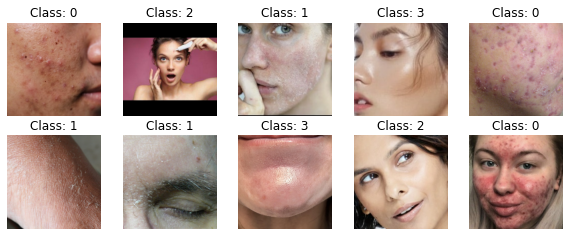

In [36]:
import matplotlib.pyplot as plt
import tensorflow as tf

def display_first_10_images(data_set):
    plt.figure(figsize=(10, 10))
    for images, labels in data_set.take(1):
        for i in range(10):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f'Class: {labels[i].numpy()}')
            plt.axis("off")

display_first_10_images(data_set)
plt.show()

In [37]:
def get_dataset_partitions_tf(ds, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
#shuffle_size parameter determines the buffer size used for shuffling
#It specifies how many elements are shuffled together in each step  

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size , seed= 12)
        
    train_size      = int(train_split * ds_size)
    validation_size = int(validation_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    validation_ds = ds.skip(train_size).take(validation_size)
    test_ds = ds.skip(train_size).skip(validation_size)
     
    return train_ds, validation_ds, test_ds

In [38]:
train_ds, validation_ds, test_ds = get_dataset_partitions_tf(data_set)

2024-03-29 11:36:16.149412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


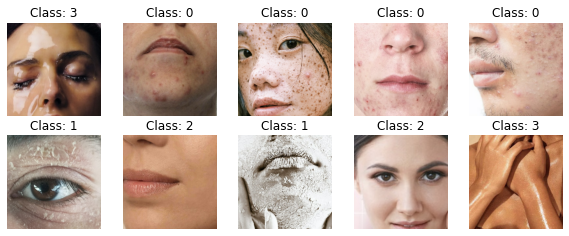

In [39]:
def display_first_10_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(10):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f'Class: {labels[i].numpy()}')
            plt.axis("off")

display_first_10_images(train_ds)
plt.show()

In [13]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# Image net is very large database of images

In [14]:
# vgg = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [15]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [16]:
folders = glob('Skin Oiliness Dataset/*')

In [17]:
len(folders)

4

In [18]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [19]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [20]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [23]:
train_datagen

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
import os
import shutil

# Define a function to save the dataset to disk
def save_dataset_to_disk(dataset, directory, class_names):
    for i, (image, label) in enumerate(dataset):
        for j in range(len(image)):
            # Get the class name corresponding to the label
            class_name = class_names[label[j].numpy()]
            # Create class directories if not exist
            class_directory = os.path.join(directory, class_name)
            os.makedirs(class_directory, exist_ok=True)
            # Save images to class directories
            filename = os.path.join(class_directory, f"image_{i * 32 + j}.jpg")
            tf.keras.preprocessing.image.save_img(filename, image[j].numpy())



In [55]:
save_dataset_to_disk(train_ds, 'Splitted Data/Train',class_names)

In [56]:
save_dataset_to_disk(test_ds, 'Splitted Data/Test',class_names)

In [57]:
save_dataset_to_disk(validation_ds, 'Splitted Data/Validation',class_names)

In [22]:
training_set = train_datagen.flow_from_directory(
    'Splitted Data/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1056 images belonging to 4 classes.


In [23]:
testing_set = train_datagen.flow_from_directory(
    'Splitted Data/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 150 images belonging to 4 classes.


In [24]:
validation_set = train_datagen.flow_from_directory(
    'Splitted Data/Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 128 images belonging to 4 classes.


In [25]:
# training_set = training_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# validation_set = validation_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# testing_set = testing_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [28]:
import scipy.ndimage

In [29]:
history = model.fit(
    training_set,
    validation_data=validation_set,  # Include the validation set here
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

Epoch 1/30


/home/thurunu/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5023 - loss: 1.2963 - val_accuracy: 0.7969 - val_loss: 0.5285
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30


2024-03-27 23:47:35.090123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/thurunu/anaconda3/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-27 23:47:35.107484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7993 - loss: 0.5445 - val_accuracy: 0.8281 - val_loss: 0.4417
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30


2024-03-27 23:48:52.339615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:48:52.342392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8325 - loss: 0.4420 - val_accuracy: 0.8672 - val_loss: 0.3600
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30


2024-03-27 23:50:10.367666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:50:10.370380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9123 - loss: 0.3034 - val_accuracy: 0.8438 - val_loss: 0.3731
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/30


2024-03-27 23:51:27.720394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:51:27.723242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9013 - loss: 0.2896 - val_accuracy: 0.8750 - val_loss: 0.3162
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/30


2024-03-27 23:52:45.446816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:52:45.449219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9161 - loss: 0.2610 - val_accuracy: 0.8906 - val_loss: 0.2987
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/30


2024-03-27 23:54:05.319726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:54:05.322300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9268 - loss: 0.2211 - val_accuracy: 0.8750 - val_loss: 0.3491
Epoch 14/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/30


2024-03-27 23:55:25.797141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:55:25.799732: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9484 - loss: 0.1787 - val_accuracy: 0.9062 - val_loss: 0.2654
Epoch 16/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/30


2024-03-27 23:56:45.171770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:56:45.174291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9325 - loss: 0.1941 - val_accuracy: 0.8828 - val_loss: 0.2881
Epoch 18/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/30


2024-03-27 23:58:02.598120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:58:02.600823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9526 - loss: 0.1591 - val_accuracy: 0.9219 - val_loss: 0.2151
Epoch 20/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/30


2024-03-27 23:59:19.795140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-27 23:59:19.797801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9732 - loss: 0.1261 - val_accuracy: 0.8828 - val_loss: 0.3120
Epoch 22/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/30


2024-03-28 00:00:36.732653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-28 00:00:36.735367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9466 - loss: 0.1694 - val_accuracy: 0.9297 - val_loss: 0.2079
Epoch 24/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/30


2024-03-28 00:01:54.124898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-28 00:01:54.127585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9502 - loss: 0.1529 - val_accuracy: 0.9141 - val_loss: 0.2476
Epoch 26/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 27/30


2024-03-28 00:03:11.840146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-28 00:03:11.842968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9620 - loss: 0.1306 - val_accuracy: 0.9453 - val_loss: 0.1809
Epoch 28/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 29/30


2024-03-28 00:04:29.678786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-28 00:04:29.681580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9681 - loss: 0.1285 - val_accuracy: 0.9219 - val_loss: 0.1964
Epoch 30/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-28 00:05:47.184123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-28 00:05:47.186760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [64]:
# r = model.fit(
#     training_set,
    
#     steps_per_epoch=len(training_set),
#     epochs=10,
#     validation_data=validation_set,  # Include the validation set here
#     validation_steps=len(validation_set),
#     verbose=4
# )

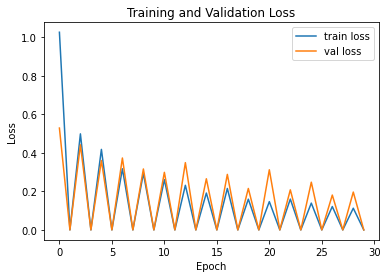

In [30]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss')  # Save the plot
plt.show()  # Display the plot

In [66]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

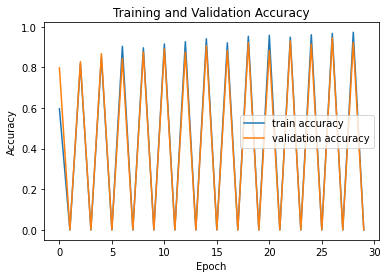

In [31]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc')  # Save the plot
plt.show()  # Display the plot

In [32]:
scores = model.evaluate(test_ds)

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 4)

first image to predict
actual label: Normal Skin
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted label: Normal Skin


2024-03-28 00:07:12.530627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


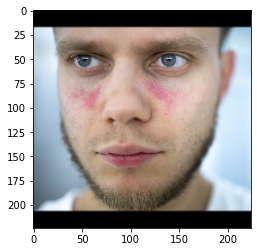

In [34]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0] .numpy()
    
    print("first image to predict")
    plt. imshow(first_image)
    print("actual label:", class_names [first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:" ,class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array (images[i].numpy())
    img_array = tf. expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions [0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


2024-03-28 00:07:20.976957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


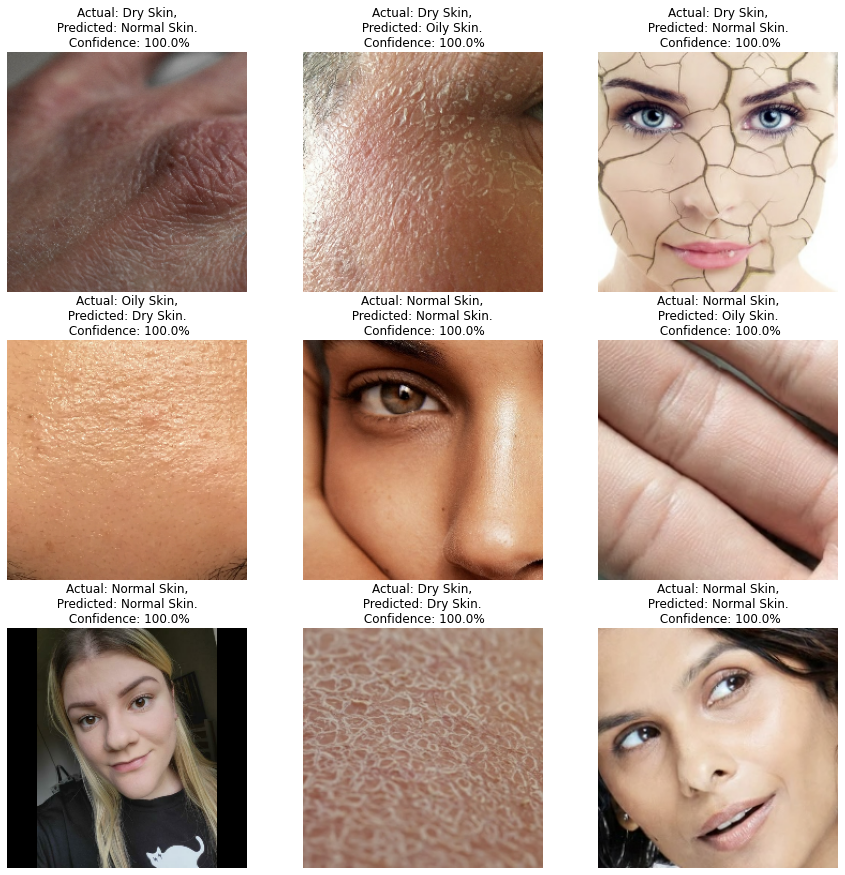

In [36]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())  
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. \n Confidence: {confidence}%")  
        plt.axis("off")

In [38]:
model_version = 2
model.save("Models/model_VGG_epochs_30.keras")

In [24]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('Models/model_VGG_epochs_50')

# Load the face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Access the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract face ROI
        face_roi = frame[y:y+h, x:x+w]

        # Resize the face ROI to match the input size expected by your model (224x224)
        resized_face = cv2.resize(face_roi, (224, 224))

        # Preprocess the resized face ROI (normalize, etc.)
        # You need to preprocess the face ROI in the same way you preprocessed your training data

        # Make predictions
        prediction = model.predict(np.expand_dims(resized_face, axis=0))
        oiliness_level = np.argmax(prediction)  # Assuming your model outputs class probabilities
        print(oiliness_level)

        # Display the oiliness level
        cv2.putText(frame, f'Oiliness: {oiliness_level}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the webcam feed
    cv2.imshow('Webcam Feed', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


ValueError: File format not supported: filepath=Models/model_VGG_epochs_50. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(Models/model_VGG_epochs_50, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [41]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def open_camera():

    # Load the trained model
    model = load_model('Models/model_VGG_epochs_50.h5')

    # Load the face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Define class labels (replace with your actual class labels)
    class_labels = ['Acne', 'Dry', 'Normal', 'Oily']

    # Access the webcam
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            # Extract face ROI
            face_roi = frame[y:y+h, x:x+w]

            # Resize the face ROI to match the input size expected by your model (224x224)
            resized_face = cv2.resize(face_roi, (224, 224))

            # Preprocess the resized face ROI (normalize, etc.)
            # You need to preprocess the face ROI in the same way you preprocessed your training data

            # Make predictions
            prediction = model.predict(np.expand_dims(resized_face, axis=0))
            predicted_class_index = np.argmax(prediction)  # Get the index of the predicted class

            # Get the predicted class label
            predicted_class_label = class_labels[predicted_class_index]

            # Display the predicted class label around the detected face
            cv2.putText(frame, f'{predicted_class_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Draw a rectangle around the detected face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the webcam feed
        cv2.imshow('Webcam Feed', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


In [42]:
open_camera()

QObject::moveToThread: Current thread (0x585d3d753e20) is not the object's thread (0x585d47187300).
Cannot move to target thread (0x585d3d753e20)

QObject::moveToThread: Current thread (0x585d3d753e20) is not the object's thread (0x585d47187300).
Cannot move to target thread (0x585d3d753e20)

QObject::moveToThread: Current thread (0x585d3d753e20) is not the object's thread (0x585d47187300).
Cannot move to target thread (0x585d3d753e20)

QObject::moveToThread: Current thread (0x585d3d753e20) is not the object's thread (0x585d47187300).
Cannot move to target thread (0x585d3d753e20)

QObject::moveToThread: Current thread (0x585d3d753e20) is not the object's thread (0x585d47187300).
Cannot move to target thread (0x585d3d753e20)

QObject::moveToThread: Current thread (0x585d3d753e20) is not the object's thread (0x585d47187300).
Cannot move to target thread (0x585d3d753e20)

QObject::moveToThread: Current thread (0x585d3d753e20) is not the object's thread (0x585d47187300).
Cannot move to tar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def open_mobile_camera():
    # Load the trained model
    model = load_model('Models/model_VGG_epochs_50.h5')

    # Load the face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Define class labels (replace with your actual class labels)
    class_labels = ['Acne', 'Dry', 'Normal', 'Oily']

    # Access the phone camera stream (replace the URL with your phone's camera stream URL)
    url = "http://192.168.19.112:8080/video"
    cap = cv2.VideoCapture(url)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            # Extract face ROI
            face_roi = frame[y:y+h, x:x+w]

            # Resize the face ROI to match the input size expected by your model (224x224)
            resized_face = cv2.resize(face_roi, (224, 224))

            # Preprocess the resized face ROI (normalize, etc.)
            # You need to preprocess the face ROI in the same way you preprocessed your training data

            # Make predictions
            prediction = model.predict(np.expand_dims(resized_face, axis=0))
            oiliness_level = np.argmax(prediction)  # Assuming your model outputs class probabilities

            # Get the corresponding class label
            oiliness_label = class_labels[oiliness_level]

            # Display the oiliness level
            cv2.putText(frame, f'Oiliness: {oiliness_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Draw a rectangle around the detected face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the camera feed
        cv2.imshow('Phone Camera Feed', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


In [14]:
open_mobile_camera()

1/1 [==============================] - 0s 78ms/step


In [25]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow  as tf

def process_single_image(image_path):
    # Load the trained model
    model = load_model('Models/model_VGG_epochs_50.h5')

    # Load the face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Define class labels (replace with your actual class labels)
    class_labels = ['Acne', 'Dry', 'Normal', 'Oily']

    # Read the image
    img = cv2.imread(image_path)

    # Convert image to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract face ROI
        face_roi = img[y:y+h, x:x+w]

        # Resize the face ROI to match the input size expected by your model (224x224)
        resized_face = cv2.resize(face_roi, (224, 224))

        # Preprocess the resized face ROI (normalize, etc.)
        # You need to preprocess the face ROI in the same way you preprocessed your training data

        # Make predictions
        print(np.expand_dims(resized_face, axis=0))
        prediction = model.predict(np.expand_dims(resized_face, axis=0))
        
        # Get the index of the highest probability
        predicted_class_index = np.argmax(prediction)
        
        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Display the predicted class label around the detected face
        cv2.putText(img, f'{predicted_class_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Draw a circle around the detected face
        center = (x + w // 2, y + h // 2)
        radius = min(w, h) // 2
        cv2.circle(img, center, radius, (255, 0, 0), 2)

    # Display the processed image
    cv2.imshow('Processed Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
path = "Splitted Data/Validation/Normal Skin/image_10.jpg"
process_single_image(path)

[[[[ 36  48  82]
   [ 36  48  82]
   [ 37  49  84]
   ...
   [ 63  81 122]
   [ 62  80 121]
   [ 62  80 121]]

  [[ 36  48  82]
   [ 36  48  82]
   [ 37  50  84]
   ...
   [ 63  81 122]
   [ 62  80 121]
   [ 62  80 121]]

  [[ 35  47  81]
   [ 35  47  81]
   [ 36  48  83]
   ...
   [ 62  81 122]
   [ 62  80 121]
   [ 62  80 121]]

  ...

  [[ 16  13  15]
   [ 16  13  15]
   [ 16  13  15]
   ...
   [ 21  20  22]
   [ 21  20  22]
   [ 21  20  22]]

  [[ 16  13  15]
   [ 16  13  15]
   [ 16  13  15]
   ...
   [ 21  20  22]
   [ 21  20  22]
   [ 21  20  22]]

  [[ 16  13  15]
   [ 16  13  15]
   [ 16  13  15]
   ...
   [ 21  20  22]
   [ 21  20  22]
   [ 21  20  22]]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
[[[[36 50 73]
   [36 50 73]
   [36 50 73]
   ...
   [32 43 70]
   [31 42 69]
   [31 42 69]]

  [[36 50 73]
   [36 50 73]
   [36 50 73]
   ...
   [32 43 70]
   [31 42 69]
   [31 42 69]]

  [[36 50 73]
   [36 50 73]
   [36 50 73]
   ...
   [32 43 70]
   [31 42 69]
   [31 42 69]]

  ...

 

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to target thread (0x640984e5b530)

QObject::moveToThread: Current thread (0x640984e5b530) is not the object's thread (0x6409872ea710).
Cannot move to tar

In [ ]:
MODEL = tf.keras.models.load_model("Models/model_VGG_epochs_50")